# FINAL PROJECT 2

# Logistic Regression dan SVM

# Anggota Kelompok
    1. Erika Taniya Devi Winckler(PYTN-KS14-020)
    2. Anaka Agung Inten Cahyani Dewi(PYTN-KS14-021)
    3. Ni Nyoman Sekar Wandani(PYTN-KS14-024)

# Overview
Dengan adanya perkembangan teknologi dan informasi saat ini, kebutuhan akan informasi cuaca yang dapat diandalkan sangatlah penting dalam berbagai aspek kehidupan sehari-hari, sehingga Prediksi cuaca merupakan salah satu faktor penting untuk menentukan cuaca atau kondisi lingkungan di berbagai wilayah salah satunya  di Australia. Dataset yang digunakan adalah Dataset Rain in Australia yang berisi kumpulan data cuaca yang mencakup informasi tentang berbagai faktor cuaca di berbagai lokasi di Australia, serta apakah terjadi hujan atau tidak pada hari berikutnya. Dataset ini mencakup fitur-fitur seperti suhu udara, kelembaban, kecepatan angin, tekanan udara, curah hujan, dan sebagainya. 
Total data sebanyak 145460 baris data. tujuan yang ingin dicapai yaitu menentukan model terbaik pada dataset Rain in Australia.

* Data Description

1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

* Objective

1. Mampu mengetahui model yang baik digunakan untuk memprediksi hujan di australia 
2. Faktor Faktor yang dapat mempengaruhi prediksi hujan


# Import pustaka yang dibutuhkan
import semua library yang digunakan dalam project.


In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, mean_squared_error


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import missingno as msno


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC


import warnings
warnings.filterwarnings('ignore')


import pickle


bold = '\033[1m'
normal = '\033[0m'

In [3]:
!conda install -c anaconda xlrd --yes

In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install openpyxl


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data Loading

In [6]:
# Membaca data dari file dataset
df_c = pd.read_csv(r'C:\\Users\PRIMA\Downloads\archive 4\weatherAUS.csv')

                  
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [7]:
# Menampilkan 5 baris pertama dataframe
df_c.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
df_c.tail(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [9]:
#Menampilkan informasi yang stuktur tentang DataFrame
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
# menghitung jumlah kemunculan setiap nilai dalam suatu kolom.
df_c.value_counts()

Date        Location      MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow
2007-11-01  Canberra      8.0      24.3     0.0       3.4          6.3       NW           30.0           SW          NW          6.0           20.0          68.0         29.0         1019.7       1015.0       7.0       7.0       14.4     23.6     No         Yes             1
2014-01-23  Perth         22.7     36.2     0.0       12.0         13.1      SE           54.0           SSE         SE          11.0          22.0          52.0         29.0         1007.8       1006.0       1.0       3.0       28.2     35.9     No         No              1
2014-01-22  Woomera       21.9     32.0     0.0       20.0         2.2       SSE          50.0           SSE         SSE         31.0          15.0          39.0         28.0   

# Missing Value

In [11]:
df_c.isna().sum()
# missing value belum jelas

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [12]:
# cek field class
print(df_c['Date'].unique())
print(df_c['Location'].unique())
print(df_c['MinTemp'].unique())
print(df_c['MaxTemp'].unique())
print(df_c['Rainfall'].unique())
print(df_c['Evaporation'].unique())
print(df_c['Sunshine'].unique())
print(df_c['WindGustDir'].unique())
print(df_c['WindGustSpeed'].unique())
print(df_c['WindDir9am'].unique())
print(df_c['WindDir3pm'].unique())
print(df_c['WindSpeed9am'].unique())
print(df_c['WindSpeed3pm'].unique())
print(df_c['Humidity9am'].unique())
print(df_c['Humidity3pm'].unique())
print(df_c['Pressure9am'].unique())
print(df_c['Pressure3pm'].unique())
print(df_c['Cloud9am'].unique())
print(df_c['Cloud3pm'].unique())
print(df_c['Temp9am'].unique())
print(df_c['Temp3pm'].unique())
print(df_c['RainToday'].unique())
print(df_c['RainTomorrow'].unique())

['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
[13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4

* Describe Data

In [13]:
# Memberikan informasi seperti nilai rata-rata, standar deviasi, nilai minimum dan maksimum, serta kuartil dari setiap kolom numerik dalam DataFrame.
df_c.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Data Cleansing

In [14]:
df_c.dropna(subset=['RainToday','RainTomorrow'],inplace=True)
df_c.shape

(140787, 23)

Dapat kita lihat terdapat penurunan baris dari 145460 menjadi 140787, karena kita menghapus nilal Nan pada kolom RainToday dan RainTomorrow

* Delete Missing Value 

In [15]:
# Menghapus beberapa kolom dari dataframe dengan menggunakan metode drop
df = df_c.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm","Location", "Date", 'WindDir9am', 'WindDir3pm', 'WindGustDir'], axis =1)
df.shape
#df.head(5)

(140787, 14)

In [16]:
df.isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

<AxesSubplot: title={'center': 'Count (RainTomorrow)'}>

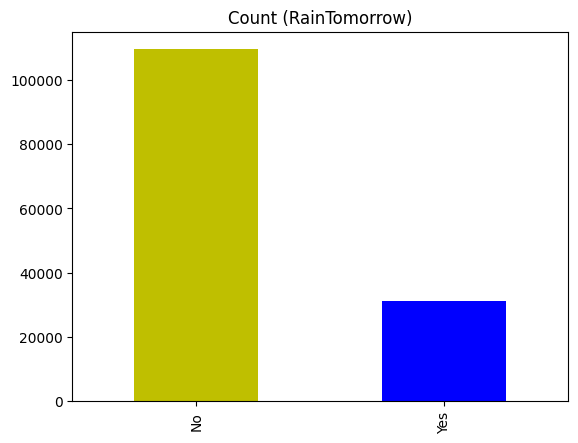

In [17]:
df['RainTomorrow'].value_counts().plot(kind='bar', title='Count (RainTomorrow)', color=['y', 'b'])

In [18]:
# mengecek data duplikat
df.duplicated().sum()

47

In [19]:
import seaborn as sns

<AxesSubplot: >

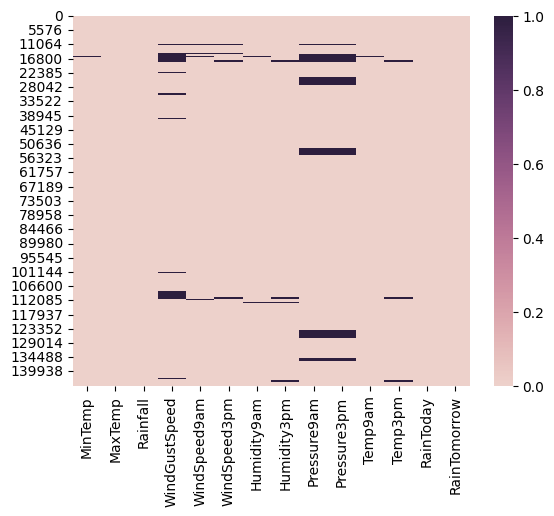

In [20]:
# peta panas (heatmap) yang menunjukkan keberadaan nilai-nilai yang hilang (NaN) dalam dataframe 
sns.heatmap( df.isnull(),cmap=sns.cubehelix_palette(as_cmap=True))

* # mengisi ke missingan tersebut menggunakan cara berikut

In [21]:

fill_list = df['MinTemp'].dropna()
df['MinTemp'] = df['MinTemp'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [22]:
df['MinTemp']

0         13.4
1          7.4
2         12.9
3          9.2
4         17.5
          ... 
145454     3.5
145455     2.8
145456     3.6
145457     5.4
145458     7.8
Name: MinTemp, Length: 140787, dtype: float64

In [23]:
fill_list = df['MaxTemp'].dropna()
df['MaxTemp'] = df['MaxTemp'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [24]:
fill_list = df['Rainfall'].dropna()
df['Rainfall'] = df['Rainfall'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [25]:
fill_list = df['WindGustSpeed'].dropna()
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [26]:
fill_list = df['WindSpeed9am'].dropna()
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [27]:
fill_list = df['WindSpeed3pm'].dropna()
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [28]:
fill_list = df['Humidity9am'].dropna()
df['Humidity9am'] = df['Humidity9am'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [29]:
fill_list = df['Humidity3pm'].dropna()
df['Humidity3pm'] = df['Humidity3pm'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [30]:
fill_list = df['Temp9am'].dropna()
df['Temp9am'] = df['Temp9am'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [31]:
fill_list = df['Pressure9am'].dropna()
df['Pressure9am'] = df['Pressure9am'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [32]:
fill_list = df['Pressure3pm'].dropna()
df['Pressure3pm'] = df['Pressure3pm'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [33]:
fill_list = df['Temp3pm'].dropna()
df['Temp3pm'] = df['Temp3pm'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [34]:
fill_list = df['RainToday'].dropna()
df['RainToday'] = df['RainToday'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [35]:
fill_list = df['RainTomorrow'].dropna()
df['RainTomorrow'] = df['RainTomorrow'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [36]:
#Menghapus missing value
df.dropna(axis=0, inplace=True)
print("Cek Missing Value")
#Mengecek missing value
df.isnull().sum()

Cek Missing Value


MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

* berdasarkan data diatas tidak terdapat missing value

<AxesSubplot: >

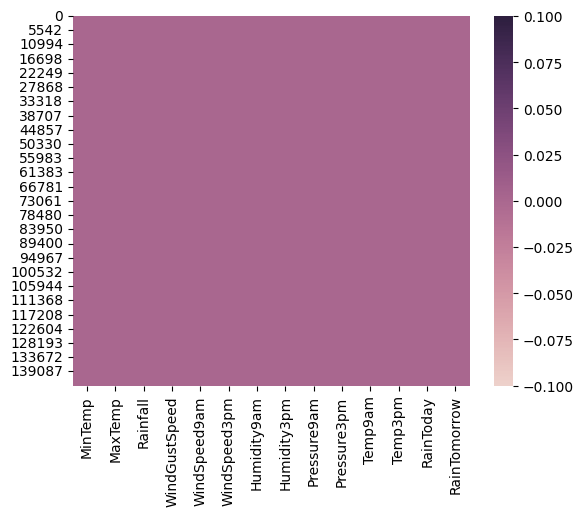

In [37]:
#membuat sebuah heatmap dengan menggunakan seaborn (sns) untuk
sns.heatmap( df.isnull(),cmap=sns.cubehelix_palette(as_cmap=True))

In [38]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 2})

In [39]:
df['RainTomorrow']

0         2
1         2
2         2
3         2
4         2
         ..
145454    2
145455    2
145456    2
145457    2
145458    2
Name: RainTomorrow, Length: 139885, dtype: int64

# **EDA (EXPLORATORY DATA ANALYST)**

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139885 entries, 0 to 145458
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        139885 non-null  float64
 1   MaxTemp        139885 non-null  float64
 2   Rainfall       139885 non-null  float64
 3   WindGustSpeed  139885 non-null  float64
 4   WindSpeed9am   139885 non-null  float64
 5   WindSpeed3pm   139885 non-null  float64
 6   Humidity9am    139885 non-null  float64
 7   Humidity3pm    139885 non-null  float64
 8   Pressure9am    139885 non-null  float64
 9   Pressure3pm    139885 non-null  float64
 10  Temp9am        139885 non-null  float64
 11  Temp3pm        139885 non-null  float64
 12  RainToday      139885 non-null  object 
 13  RainTomorrow   139885 non-null  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 16.0+ MB


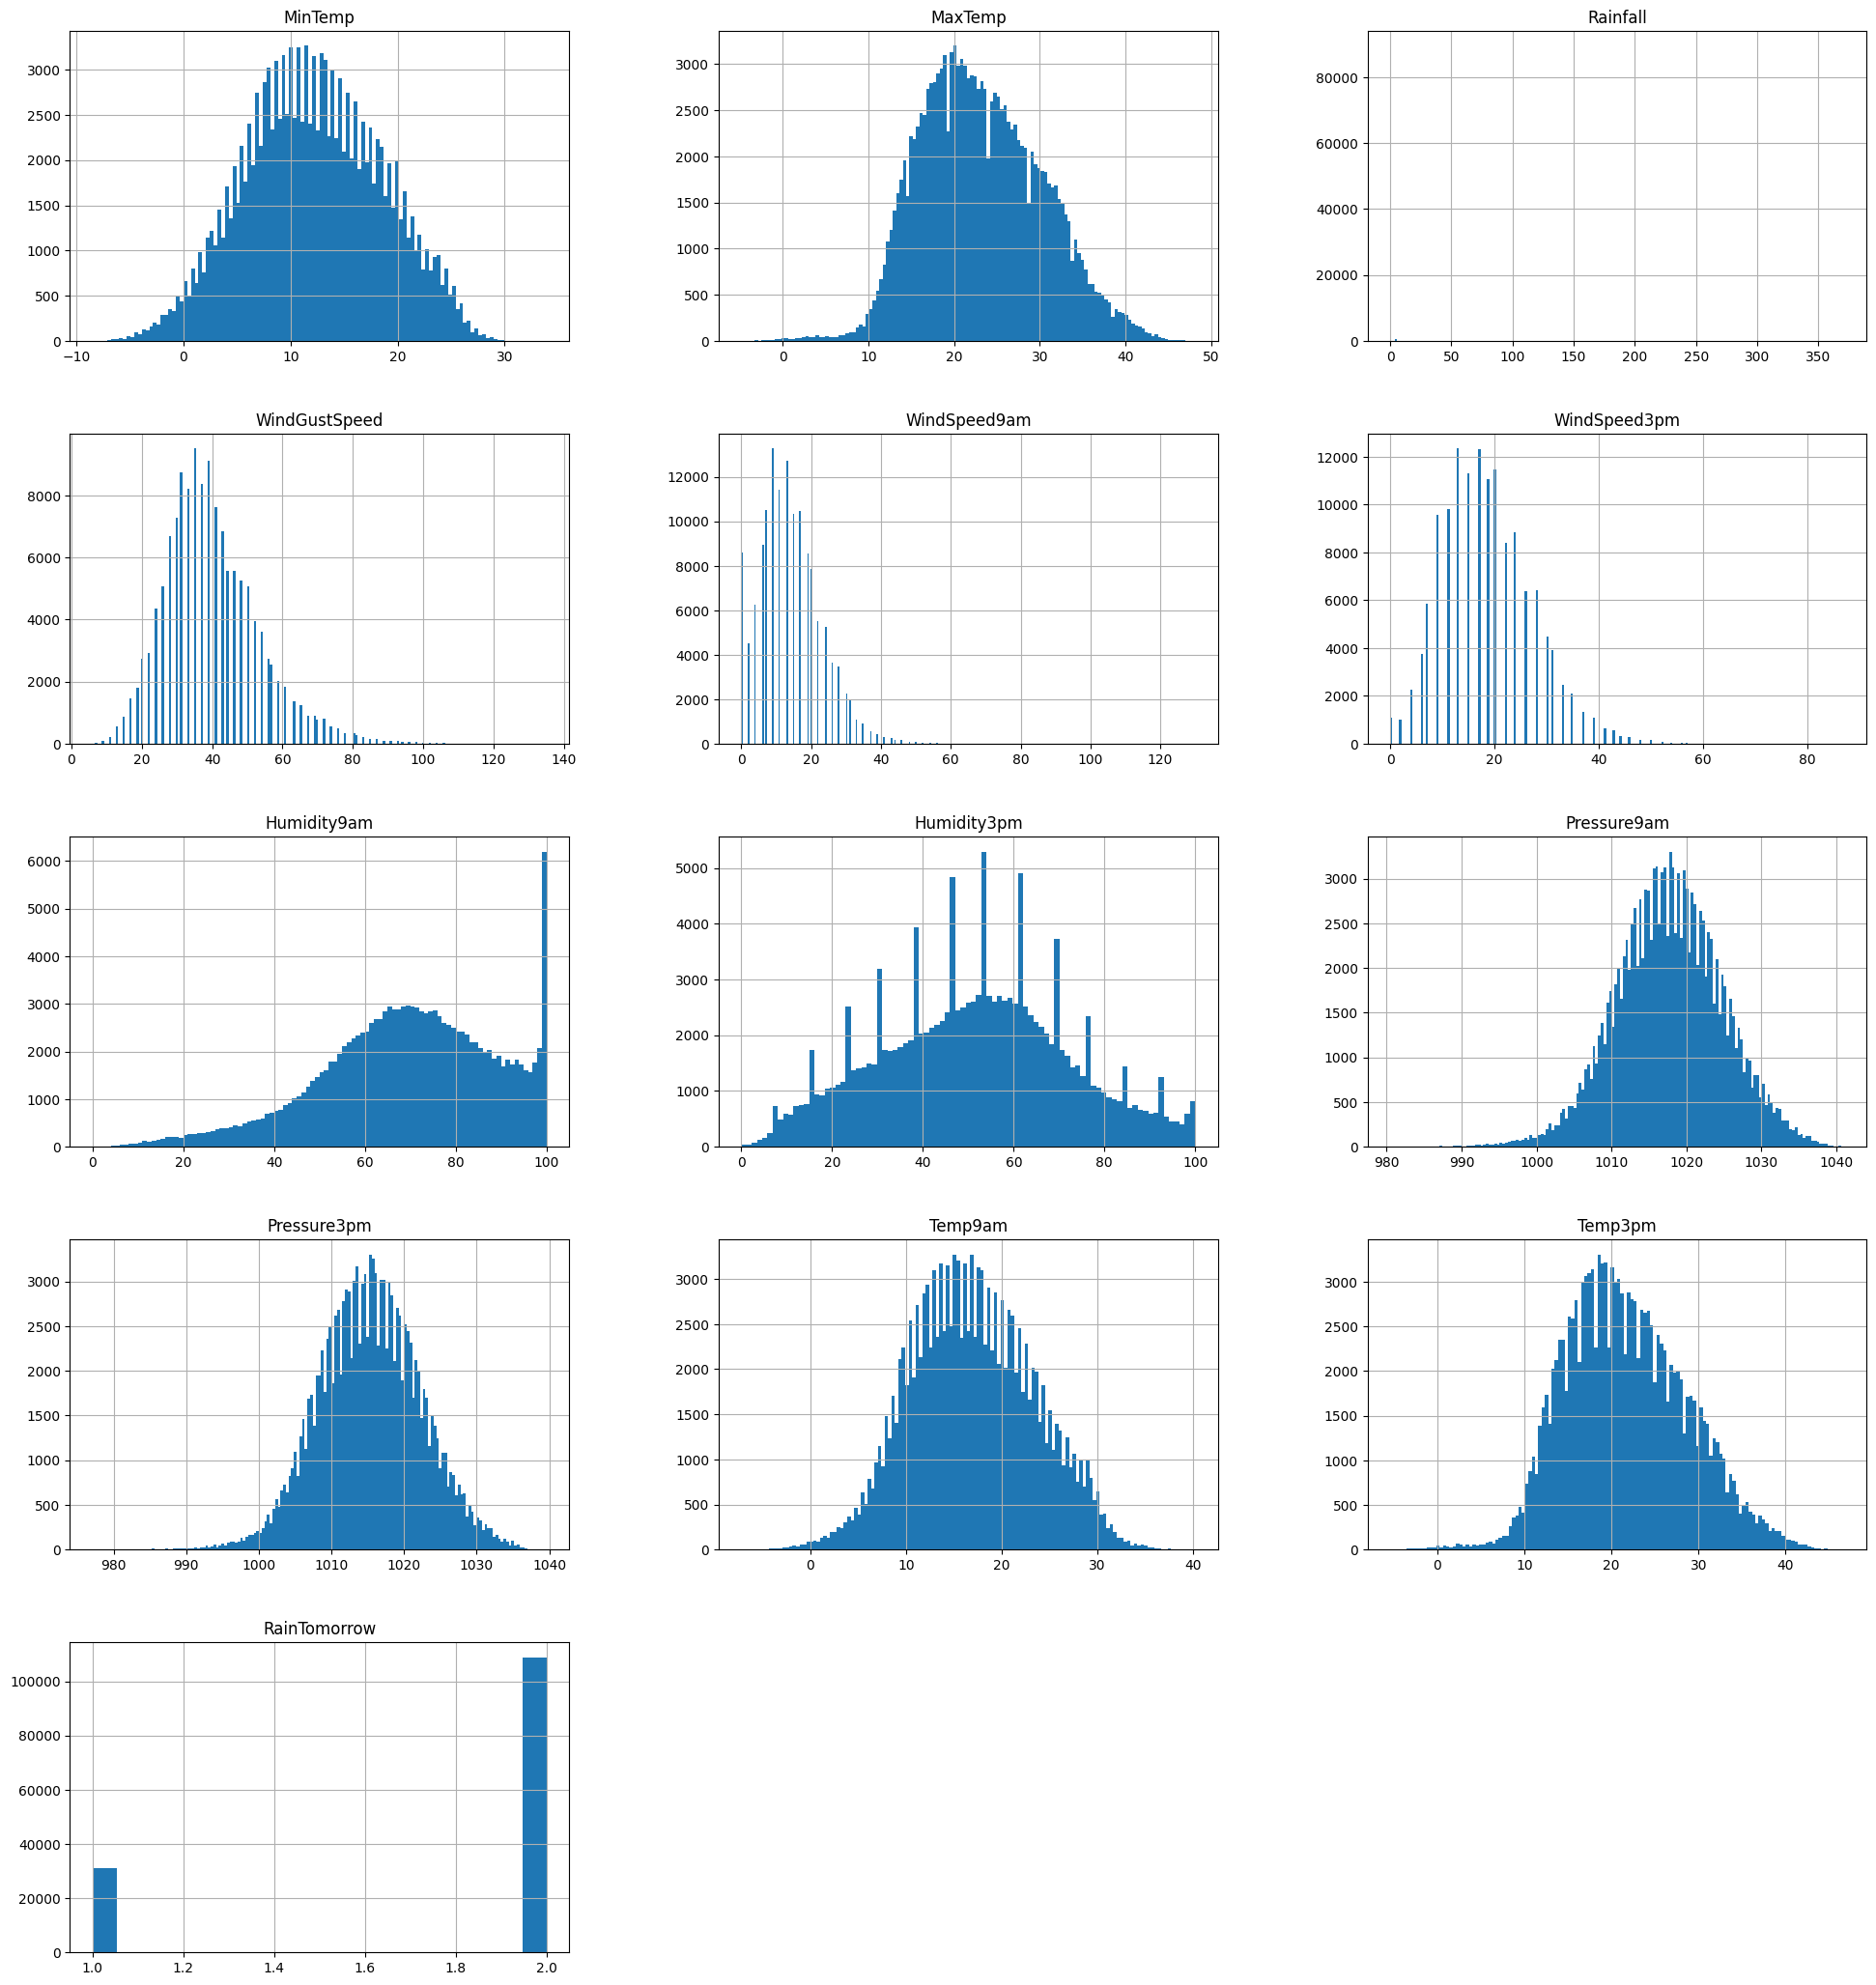

In [41]:
# Melihat distribusi frekuensi
df.hist(bins='auto',layout=(15,3), figsize=(24,80));

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# membuat catagorical column
df_categorical = df[['RainToday']]


# describe atttribute categorical


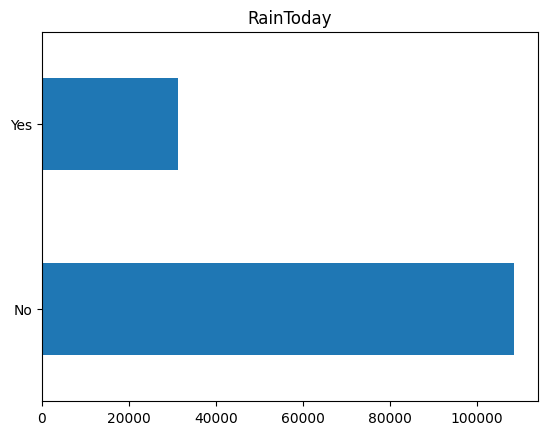

In [44]:
for column in df_categorical.columns:
    df_categorical[column].value_counts().plot(kind='barh')  # Hanya menampilkan 10 data teratas
    plt.title(column)
    plt.show()

In [45]:
# # x = df[['MinTemp', 'MaxTemp', 'WindGustSpeed','WindSpeed9am','Humidity3pm','RainToday']]
# y = df['RainTomorrow']

# for categorical in x.columns:
#     sns.boxplot(x=x[categorical], y=y, data=df)
#     plt.gcf().set_size_inches((20,8))
#     plt.show()

In [46]:
#menghasilkan daftar kolom yang terdiri dari semua kolom dalam DataFrame df, kecuali kolom-kolom yang disebutkan dalam list 
columns_continue = df.columns
columns_continue = [x for x in columns_continue if x not in ['MinTemp', 'MaxTemp', 'WindGustSpeed','WindDir9am','WindDir3pm']]

In [47]:
len(columns_continue)

11

In [48]:
columns_continue

['Rainfall',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

*Membuat sebuah boxplot untuk beberapa atribut berkelanjutan (continuous) dalam DataFrame df. Boxplot akan menunjukkan distribusi nilai dan outliers dari atribut-atribut yang dipilih.

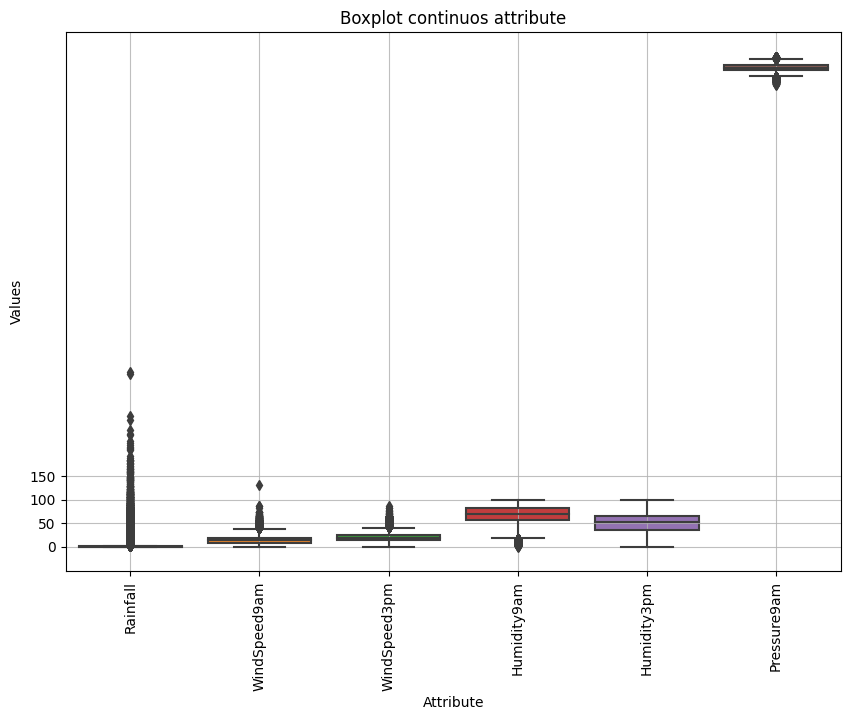

In [49]:
plt.figure(figsize=(10,7))
plt.title("Boxplot continuos attribute")
sns.boxplot(df[ ['Rainfall',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am']])
plt.xlabel("Attribute")
plt.ylabel("Values")
plt.yticks(np.arange(0,200, 50))
plt.xticks(rotation=90)
plt.grid(alpha=0.8)
plt.show()

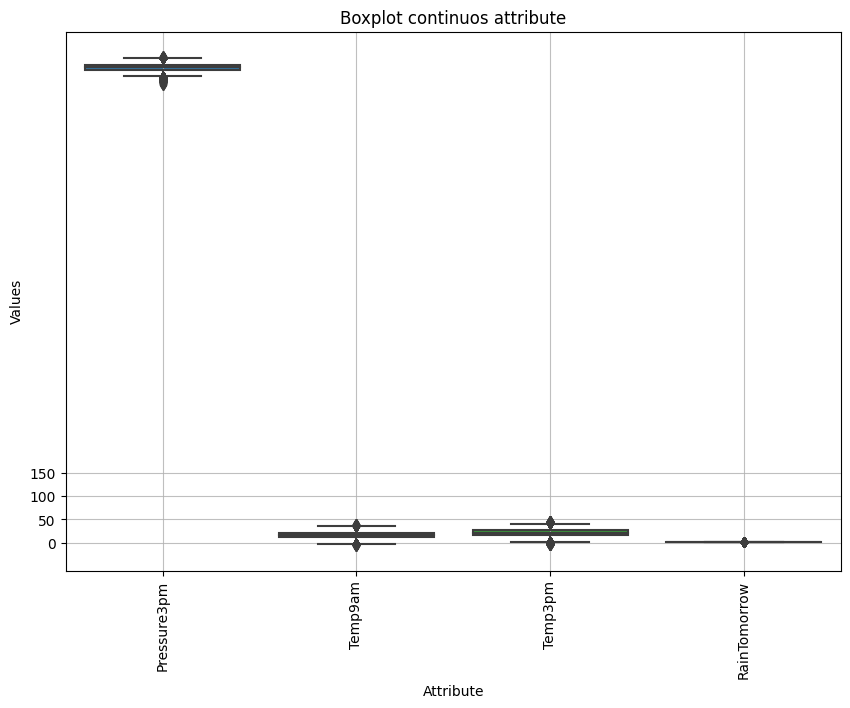

In [50]:
plt.figure(figsize=(10,7))
plt.title("Boxplot continuos attribute")
sns.boxplot(df[ ['Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']])
plt.xlabel("Attribute")
plt.ylabel("Values")
plt.yticks(np.arange(0,200, 50))
plt.xticks(rotation=90)
plt.grid(alpha=0.8)
plt.show()

In [51]:
#Menggunakan LabelEncoder dari library scikit-learn (sklearn
from sklearn.preprocessing import LabelEncoder

for column in df_categorical.columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])

In [52]:
df['RainTomorrow'].unique()

array([2, 1], dtype=int64)

# Correlatiom 1

In [53]:
numer_col = [
    "MinTemp",
    "MaxTemp",
    "Rainfall",
    "WindGustSpeed",
    "WindSpeed9am",
    "WindSpeed3pm",
    "Humidity9am",
    "Humidity3pm",
    "Pressure9am",
    "Pressure3pm",
    "Temp9am",
    "Temp3pm",
    "RainTomorrow"
]

data_numer = df[numer_col]

data_numer.head(5)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,2
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,2
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,2
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,2


### Correlation : Data Visualization semua kolom

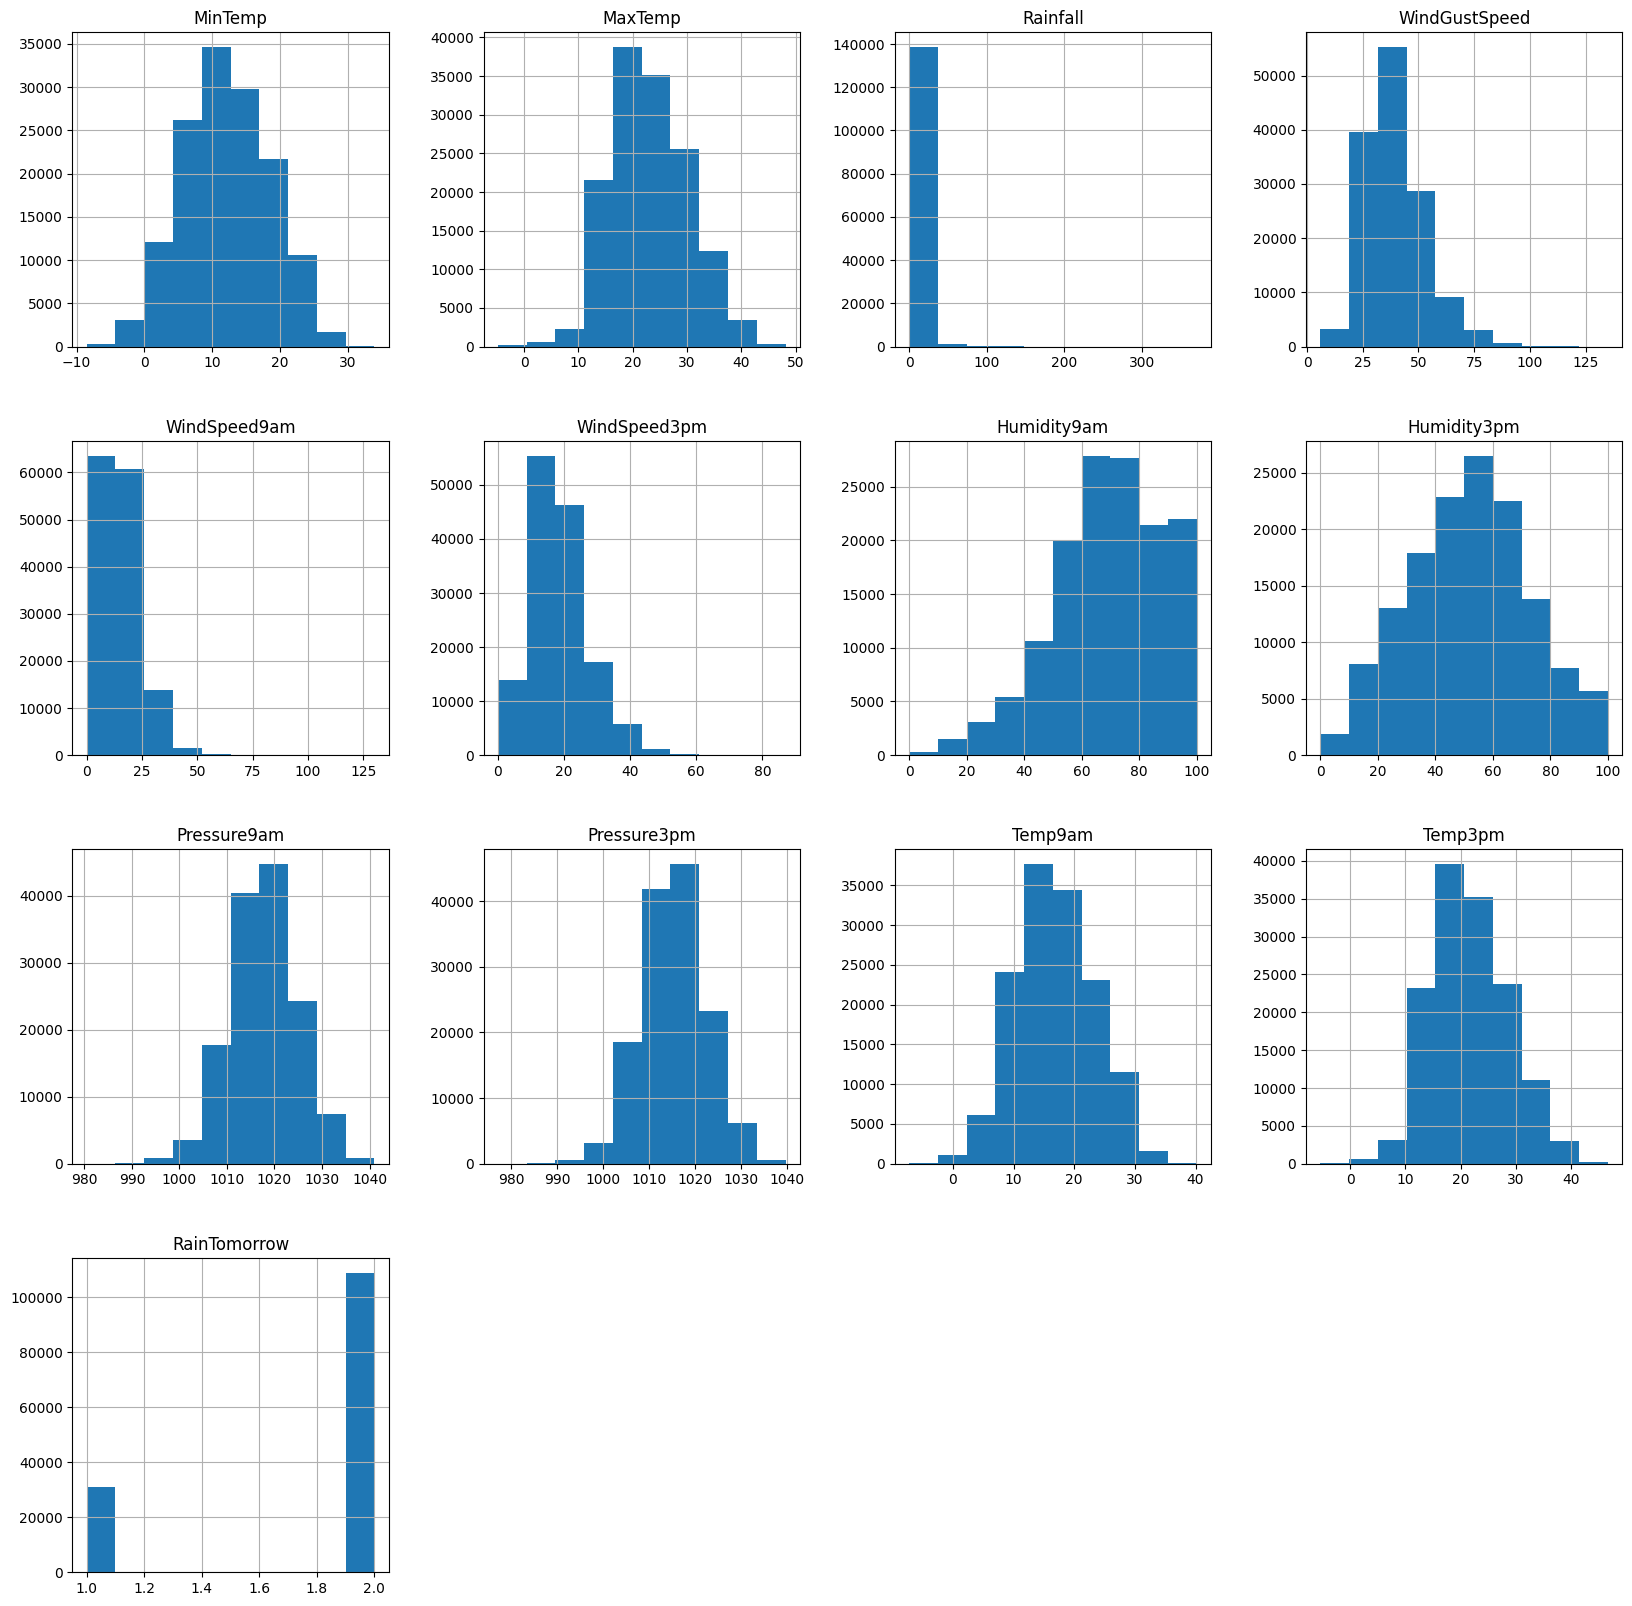

In [54]:
df[numer_col].hist(bins=10, figsize = (20,20))

# Save Plot
plt.savefig("numer_col.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')
plt.show()

In [55]:
corr_num = data_numer.corr()
corr_num

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
MinTemp,1.000000,0.730428,0.102669,0.169890,0.177783,0.177116,-0.233442,0.005981,-0.399053,-0.407841,0.894834,0.698908,-0.083604
MaxTemp,0.730428,1.000000,-0.076257,0.066066,0.017122,0.054231,-0.501195,-0.499129,-0.288036,-0.373010,0.878013,0.969907,0.159869
Rainfall,0.102669,-0.076257,1.000000,0.123755,0.087084,0.057558,0.220638,0.249630,-0.151423,-0.113416,0.010043,-0.077691,-0.238396
WindGustSpeed,0.169890,0.066066,0.123755,1.000000,0.557638,0.632497,-0.201771,-0.024960,-0.393648,-0.356370,0.144072,0.031645,-0.218811
WindSpeed9am,0.177783,0.017122,0.087084,0.557638,1.000000,0.507373,-0.266375,-0.029811,-0.206552,-0.158695,0.131607,0.005455,-0.089663
WindSpeed3pm,0.177116,0.054231,0.057558,0.632497,0.507373,1.000000,-0.143267,0.015732,-0.263060,-0.228155,0.165798,0.029200,-0.085814
Humidity9am,-0.233442,-0.501195,0.220638,-0.201771,-0.266375,-0.143267,1.000000,0.652785,0.124530,0.165934,-0.471671,-0.489383,-0.253481
Humidity3pm,0.005981,-0.499129,0.249630,-0.024960,-0.029811,0.015732,0.652785,1.000000,-0.025009,0.045722,-0.217489,-0.547955,-0.437597
Pressure9am,-0.399053,-0.288036,-0.151423,-0.393648,-0.206552,-0.263060,0.124530,-0.025009,1.000000,0.865554,-0.372759,-0.249598,0.224192
Pressure3pm,-0.407841,-0.373010,-0.113416,-0.356370,-0.158695,-0.228155,0.165934,0.045722,0.865554,1.000000,-0.414767,-0.341690,0.206947


# Correlation : Data Visualization

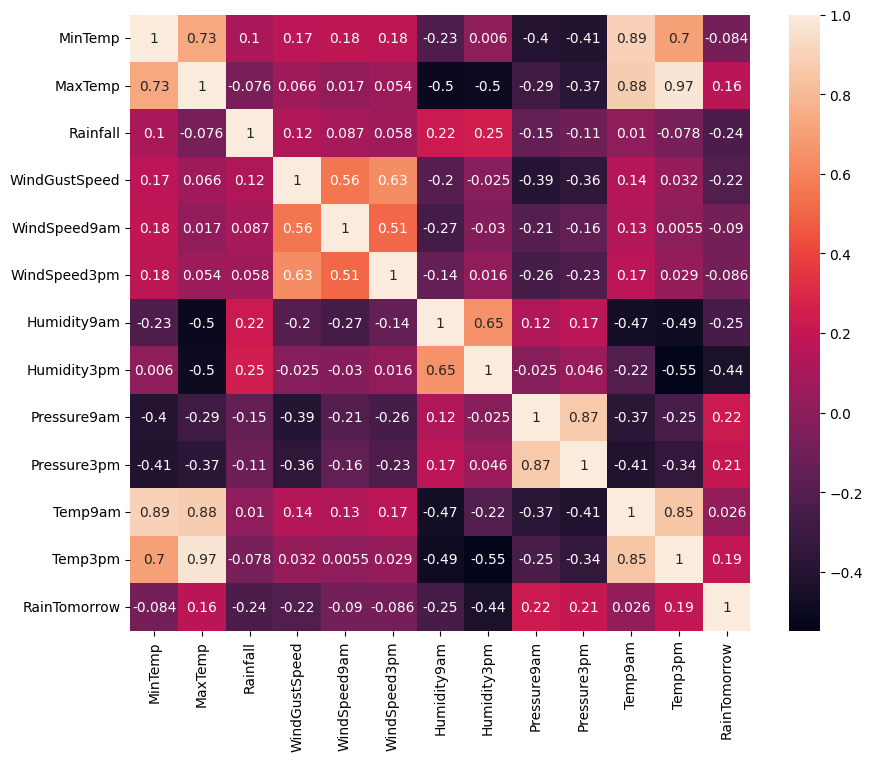

In [56]:
plt.figure(figsize=(10,8))

sns.heatmap(corr_num, annot=True)
# Save Plot
plt.savefig("corr_heatmap_num.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')
plt.show();

## Presentase Curah Hujan Besok

Text(0.5, 41.84722222222221, 'Hari besok Hujan')

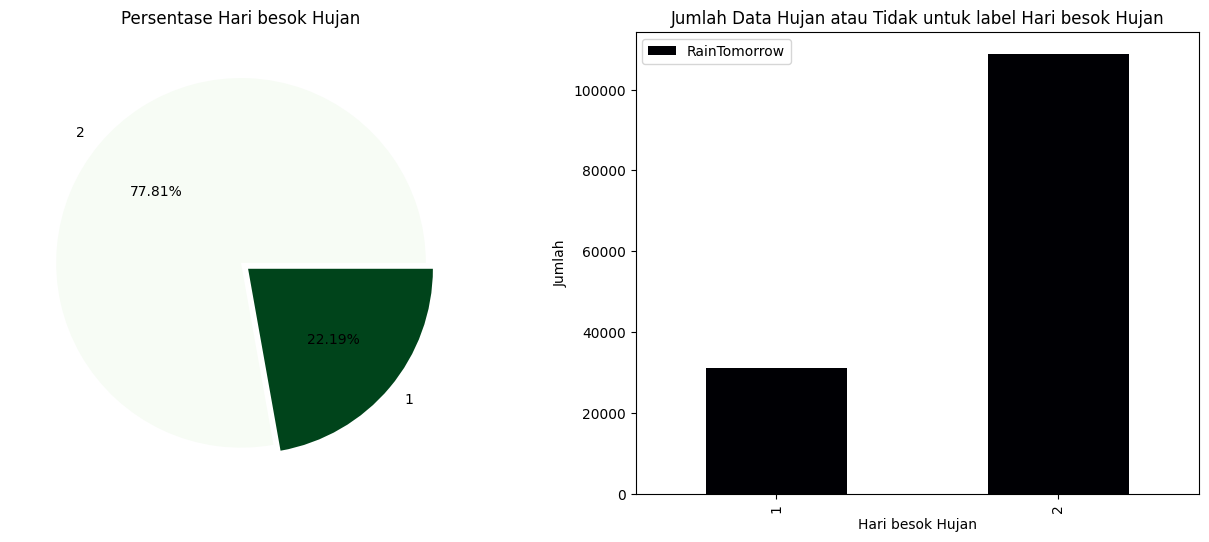

In [57]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# persentase "Hari besok Hujan"
df['RainTomorrow'].value_counts().plot(
    kind='pie',
    autopct='%.2f%%',
    explode=[0,0.05], 
    cmap='Greens',
    shadow=False,
    ax=ax[0]
)
ax[0].set_title('Persentase Hari besok Hujan')
ax[0].set_ylabel('')

# Barchart besaran setiap nilai pada kelas target
df.groupby('RainTomorrow').agg({'RainTomorrow':'count'}).plot(
    kind='bar',
    ax=ax[1],
    cmap='inferno'
)

# Save Plot
plt.savefig("rainfall_tomorrow.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

ax[1].set_title('Jumlah Data Hujan atau Tidak untuk label Hari besok Hujan')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Hari besok Hujan')

# Visualisasi data Curah Hujan dan Kelembaban

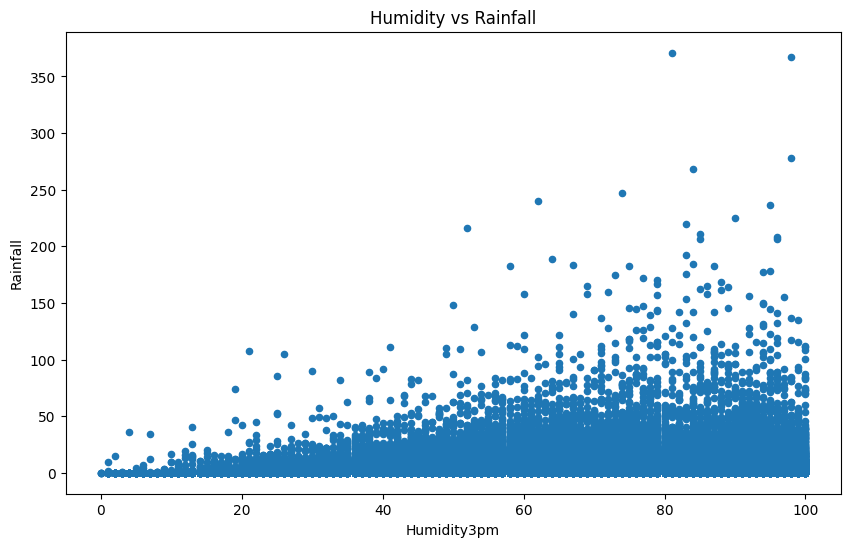

In [58]:
data_numer.plot(kind='scatter',x='Humidity3pm', y='Rainfall',
               figsize=(10,6))
plt.title('Humidity vs Rainfall')

# Save Plot
plt.savefig("scatter_numer.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

berdasarkan humidity diatas dapat disimpulkan Semakin tinggi humiditynya maka makin tinggi curah hujan nya  

# MODELING

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139885 entries, 0 to 145458
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        139885 non-null  float64
 1   MaxTemp        139885 non-null  float64
 2   Rainfall       139885 non-null  float64
 3   WindGustSpeed  139885 non-null  float64
 4   WindSpeed9am   139885 non-null  float64
 5   WindSpeed3pm   139885 non-null  float64
 6   Humidity9am    139885 non-null  float64
 7   Humidity3pm    139885 non-null  float64
 8   Pressure9am    139885 non-null  float64
 9   Pressure3pm    139885 non-null  float64
 10  Temp9am        139885 non-null  float64
 11  Temp3pm        139885 non-null  float64
 12  RainToday      139885 non-null  int32  
 13  RainTomorrow   139885 non-null  int64  
dtypes: float64(12), int32(1), int64(1)
memory usage: 15.5 MB


In [60]:
#Memmbagi DataFrame df menjadi dua bagian: df_features (yang berisi semua kolom kecuali 'RainTomorrow') dan df_targets 
df_features = df.drop(['RainTomorrow'], axis=1)
df_targets = df['RainTomorrow']

In [61]:
#Mengimpor beberapa kelas dari beberapa moodul dalam library
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score

In [62]:
#Membagi data menjadi data train dan data test menggunakan fungsi train_test_split dari modul model_selection dalam library
X_train, X_test, y_train, y_test = train_test_split(df_features, df_targets, test_size=0.8, random_state=10)

In [63]:
print(X_train.shape, y_train.shape)

(27977, 13) (27977,)


In [64]:
print(X_train.value_counts(), y_train.value_counts())

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday
-7.8     -1.3     7.4       26.0           9.0           6.0           97.0         98.0         1022.6       1018.1       -7.0     -3.5     1            1
 14.9     28.4    0.0       48.0           6.0           20.0          66.0         39.0         1022.4       1022.6        19.5     26.5    0            1
          30.2    0.0       50.0           31.0          22.0          47.0         16.0         1015.5       1012.5        20.0     28.2    0            1
                            48.0           13.0          22.0          59.0         43.0         1017.3       1013.5        23.5     29.8    0            1
          30.1    0.0       46.0           9.0           13.0          44.0         31.0         1021.8       1017.9        21.2     29.4    0            1
                                                                     

Menggunakan Logistic Regression untuk melatih model dan menghitung akurasi dari prediksi model.

In [65]:
#Mengimpor kelas LogisticRegression dari sklearn.linear_model, fungsi train_test_split dari sklearn.model_selection, dan accuracy_score dari sklearn.metrics.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Membuat objek LogisticRegression dengan LogisticRegression() dan melatih model menggunakan metode .fit() dengan data latih X_train dan y_train
logistic_Regresion = LogisticRegression()
logistic_Regresion.fit(X_train, y_train)

#Menggunakan model yang telah dilatih untuk melakukan prediksi pada data uji X_test dengan menggunakan metode .predict() dan menyimpan hasil prediksi dalam y_pred_logistic_regression.
y_pred_logistic_regression = logistic_Regresion.predict(X_test)

#Menghitung akurasi dengan membandingkan prediksi y_pred_logistic_regression dengan target aktual y_test menggunakan fungsi accuracy_score()
accuracy_loistic_regression = accuracy_score(y_test, y_pred_logistic_regression)

print("Model accuracy score:", accuracy_loistic_regression)

Model accuracy score: 0.8359634699932087


Menggunakan SVM untuk melatih model dan menghitung akurasi dari prediksi model.

In [66]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("Model accuracy score:", accuracy_svc)

Model accuracy score: 0.8144547306716231


In [67]:
# Menampilkan hasil akurasi dari Logistic Regression dan SVM yaitu 
print("Hasil akurasi dari Logistic Regression dan SVM yaitu ")
print("akurasi logistic regression:", accuracy_loistic_regression)
print("akurasi SVM:", accuracy_svc)


Hasil akurasi dari Logistic Regression dan SVM yaitu 
akurasi logistic regression: 0.8359634699932087
akurasi SVM: 0.8144547306716231


# Kesimpulan : 
1. Berdasarkan akurasi diatas model yang baik digunakan untuk memprediksi hujan di Australia yaitu  SVM (Support Vector Machine), karena hasil akurasinya sebesar 0.813
2. Berdasarkan analisa diatas, terdapat beberapa faktor yang mempengaruhi prediksi hujan yaitui: location, rainfall, WindGustSpeed, Humidity3pm, dan RainToday.